# p.195 연습
대출자들의 채무 상환과 관련된 데이터를 활용하여 상환 여부를 예측하기 위한 KNN 분석을 실시하고 결과를 해석하시오.
* 목표변수 : BAD(범주형)
* 데이터 비율 train : test = 0.7 : 0.3
* random_state = 1234

# Step 0. 패키지 불러오기

In [2]:
# 데이터 구성
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 한글, 음수 표시
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
# 데이터 분리
from sklearn.model_selection import train_test_split
# Scaler
from sklearn.preprocessing import StandardScaler
# KNN
from sklearn.neighbors import KNeighborsClassifier
# GridSearchCV
from sklearn.model_selection import GridSearchCV
# 평가함수
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
# 경고 메시지
import warnings
warnings.filterwarnings('ignore')

# Step 1. 데이터 구성하기

### 데이터 불러오기

In [3]:
df_raw = pd.read_csv('D:/Study/PoscoAcademy/2_bigdata/raw_data/HMEQ.csv', encoding = 'euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


### 결측치 처리

In [4]:
# 결측치 확인
df_raw.isna().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [5]:
# JOB 변수 결측치 Other 대체
df_raw['JOB'].fillna('Other', inplace = True)
# 숫자형 변수 결측치 평균 대체
df_raw.fillna(df_raw.mean(), inplace = True)

### 더미변수 생성

In [6]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


### 데이터 분리

In [7]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop('BAD', axis = 1, inplace = False)
df_raw_y = df_raw_dummy['BAD']
# 데이터 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print('train data X size :', df_train_x.shape)
print('train data Y size :', df_train_y.shape)
print('test data X size :', df_test_x.shape)
print('test data Y size :', df_test_y.shape)

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


# Step 2. KNN 모델 생성

### 기본 옵션으로 모델 생성

In [9]:
# 기본 모델
knn_basic = KNeighborsClassifier()
knn_basic.fit(df_train_x, df_train_y)
# train/test 데이터 설명력
print('Score in train set :', knn_basic.score(df_train_x, df_train_y).round(4))
print('Score in test set :', knn_basic.score(df_test_x, df_test_y).round(4))

Score in train set : 0.9161
Score in test set : 0.9076


### Hyper Parameter

##### 이웃 수

In [12]:
# train/test 설명력 저장
train_accuracy = []
test_accuracy = []

# 이웃 수
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors['TestAccuracy'] = test_accuracy

# 모델 설명력 확인
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.877
1,2,0.928,0.912
2,3,0.929,0.913
3,4,0.916,0.914
4,5,0.916,0.908
5,6,0.913,0.911
6,7,0.913,0.912
7,8,0.910,0.912
8,9,0.911,0.913
9,10,0.909,0.910


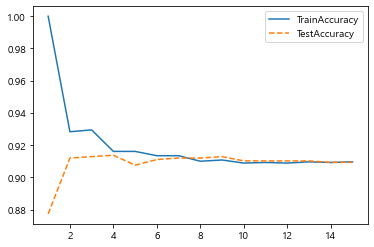

In [14]:
# 모델 설명력 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = 'TrainAccuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle = '--', label = 'TestAccuracy')
plt.legend()

##### 가중치별 이웃 수

In [16]:
# train/test 설명력 저장
train_accuracy = []
test_accuracy = []

# 가중치별 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2
para_weights = (['uniform']) * 10 + (['distance'] * 10)

for (v_n_neighbors,v_weights) in zip(para_n_neighbors,para_weights) :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors,
                               weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_neighbors
df_accuracy_weights['Weights'] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights['TestAccuracy'] = test_accuracy

# 모델 설명력 확인
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.877
1,2,uniform,0.928,0.912
2,3,uniform,0.929,0.913
3,4,uniform,0.916,0.914
4,5,uniform,0.916,0.908
5,6,uniform,0.913,0.911
6,7,uniform,0.913,0.912
7,8,uniform,0.910,0.912
8,9,uniform,0.911,0.913
9,10,uniform,0.909,0.910


<AxesSubplot:xlabel='Neighbors'>

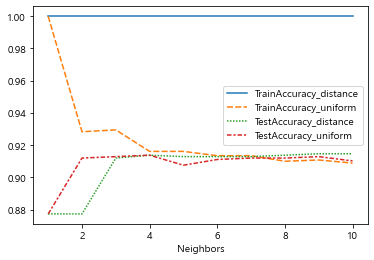

In [20]:
# 데이터 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors',
                                                      columns = 'Weights',
                                                      values = ['TrainAccuracy','TestAccuracy'])
# 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
# 모델 설명력 그래프 확인
sns.lineplot(data = df_accuracy_weights_pivot)

##### 거리 계산 방법별 이웃 수

In [21]:
# train/test 설명력 저장
train_accuracy = []
test_accuracy = []

# 가중치별 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 3
para_metric = ['minkowski'] * 10 + ['euclidean'] * 10 + ['manhattan'] * 10

for (v_n_neighbors,v_metric) in zip(para_n_neighbors,para_metric) :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors,
                               weights = 'uniform',
                               metric = v_metric)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric['Neighbors'] = para_n_neighbors
df_accuracy_metric['Metric'] = para_metric
df_accuracy_metric['TrainAccuracy'] = train_accuracy
df_accuracy_metric['TestAccuracy'] = test_accuracy

# 모델 설명력 확인
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.877
1,2,minkowski,0.928,0.912
2,3,minkowski,0.929,0.913
3,4,minkowski,0.916,0.914
4,5,minkowski,0.916,0.908
5,6,minkowski,0.913,0.911
6,7,minkowski,0.913,0.912
7,8,minkowski,0.910,0.912
8,9,minkowski,0.911,0.913
9,10,minkowski,0.909,0.910


<AxesSubplot:xlabel='Neighbors'>

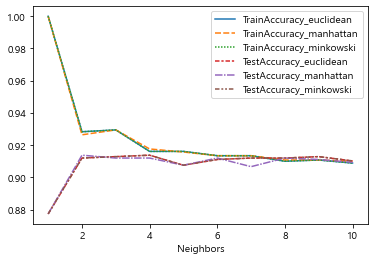

In [22]:
# 데이터 변환
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = 'Neighbors',
                                                    columns = 'Metric',
                                                    values = ['TrainAccuracy','TestAccuracy'])
# 하나의 level로 변환
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + '_' + level1
# 모델 설명력 그래프 확인
sns.lineplot(data = df_accuracy_metric_pivot)

# Step 3. 최종 모델 선정

### 최종 모델 생성

In [23]:
# 최종 모델
knn_final = KNeighborsClassifier(n_neighbors = 4,
                                 weights = 'uniform',
                                 metric = 'euclidean')
knn_final.fit(df_train_x, df_train_y)
# train/test 데이터 설명력
print('Score in train set :', knn_final.score(df_train_x, df_train_y).round(4))
print('Score in test set :', knn_final.score(df_test_x, df_test_y).round(4))

Score in train set : 0.9161
Score in test set : 0.9138


### 최종 모델 평가

In [24]:
# 평가
y_pred = knn_final.predict(df_test_x)
print('Accuracy : {0:.3f}\n'.format(knn_final.score(df_test_x,df_test_y)))
print('Confusion matrix :\n{}'.format(confusion_matrix(df_test_y, y_pred)))
# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy : 0.914

Confusion matrix :
[[1018    3]
 [  94   10]]
              precision    recall  f1-score   support

           0      0.915     0.997     0.955      1021
           1      0.769     0.096     0.171       104

    accuracy                          0.914      1125
   macro avg      0.842     0.547     0.563      1125
weighted avg      0.902     0.914     0.882      1125

